# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [11]:
X_treino = pd.read_csv('X_train_balanced.csv', delimiter = ',')
X_teste = pd.read_csv('X_test.csv', delimiter = ',')
Y_treino = pd.read_csv('y_train_balanced.csv', delimiter = ',')
Y_teste = pd.read_csv('y_test.csv', delimiter = ',')
print(f"X_treino tem {X_treino.shape[0]} linhas.")
print(f"Y_treino tem {Y_treino.shape[0]} linhas.")
print(f"X_teste tem {X_teste.shape[0]} linhas.")
print(f"Y_teste tem {Y_teste.shape[0]} linhas.")
# número de linhas, check.

X_treino tem 117950 linhas.
Y_treino tem 117950 linhas.
X_teste tem 24927 linhas.
Y_teste tem 24927 linhas.


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

In [ ]:
'''  
Uma vez que temos nossos dados de treino e teste preparados (limpos, balanceados e igualados) podemos seguir para o modelo de predição da árvore de decisão
O algoritmo escolhe os melhores features para começar (que mais tem influência na variável que desejamos prever) 
e começa a fazer critérios de segregação a partir de perguntas (similar ao que fizemos no tópico 6)
isso vai gerando seleções cada vez mais 'puras'. Isso acontece até que não haja mais features para serem usados como critério de segregação. 
Quando as seleções passam por todos os critérios do algorítmo, elas estão em seu estágio mais puro e passam por métricas de regressão para verificar o 
seu peso de impacto na variável alvo (cada seleção tem seu valor de média - entre outras propriedades - aferida).
Acontece que ao deixar o modelo fazer isso indefinidamente faz com que ele acabe tendo valores da média muito próximos de seus valores absolutos.
É como se eu tivesse restringido e segregadoum grupo tantas e tantas vezes que
ele só tivesse um único representante e a média desse grupo é o valor desse único indivíduo.
Assim, a previsão só funcionará de maneira precisa para aquele indivíduo e falhará quando indivíduos semelhantes forem colocados á prova.
Quando 'podamos' nossa árvore, estamos falando para o programa não segregar tanto uma única seleção e isso acaba dando a ele uma margem mais assertiva.
Na prática, funcionaria mais ou menos assim:
Qual a chance de encontrar um ruivo em uma determinada população?
Qual a chance de encontrar um ruivo de olhos claros?
Qual a chance de encontrar um ruivo de olhos claros e albino? - ao podar 'albino' eu com certeza teria muitos representantes a mais!
Quanto mais segregado for o grupo, menor a quantidade de indivíduos pertencentes a ele e mais absoluta a sua hegemonia naquela seleção
E isso para estatística inferencial, é péssimo.
'''

"  \nUma vez que temos nossos dados de treino e teste preparados (limpos, balanceados e igualados) podemos seguir para o modelo de predição da árvore de precisão\nO algoritmo escolhe os melhores features para começar (que mais tem influência na variável que desejamos prever) \ne começa a fazer critérios de segregação a partir de perguntas (similar ao que fizemos no tópico 6)\nisso vai gerando seleções cada vez mais 'puras'. Isso acontece até que não haja mais features para serem usados como critério de segregação. \nQuando as seleções passam por todos os critérios do algorítmo, elas estão em seu estágio mais puro e passam por métricas de regressão para verificar o \nseu peso de impacto na variável alvo(cada seleção tem seu valor de média - entre outras propriedades - aferida).\nAcontece que ao deixar o modelo fazer isso indefinidamente faz com que ele acabe tendo valores da média muito próximos de seus valores absolutos.\nÉ como se eu tivesse restringido e segregadoum grupo tantas e ta

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [15]:
modelo_arvore = DecisionTreeClassifier(criterion='gini', random_state=0)
modelo_arvore.fit(X_treino, Y_treino)
Y_previsao_treino = modelo_arvore.predict(X_treino)
acuracia_treino = accuracy_score(Y_treino, Y_previsao_treino)
print('O valor da acurácia no treinamento é:')
display(acuracia_treino)
# O valor de 0.9997286986011021 para acurácia pode indicar problemas de sobreajuste - como se fosse um cão velho que está acostumado a um truque, 
# ele executa o comando de treino muito bem, mas dificilmente se sairá bem com outros comandos (novos dados).

O valor da acurácia é:


0.9997286986011021

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [19]:
Y_previsao_teste = modelo_arvore.predict(X_teste)
acuracia_teste = accuracy_score(Y_teste, Y_previsao_teste)
print('O valor da acurácia no teste é:')
display(acuracia_teste)
matriz_confusao = confusion_matrix(Y_teste, Y_previsao_teste)
print(matriz_confusao)
# Quando comparamos o valor de acurácia do treino com o de teste, podemos observar que há uma diferença significativa entre eles. Para melhor adequar o modelo
# de precisão iremos tentar realizar a 'poda' da árvore para amenizar o overfitting. 

O valor da acurácia no teste é:


0.789986761343122

[[16741  2908]
 [ 2327  2951]]


# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

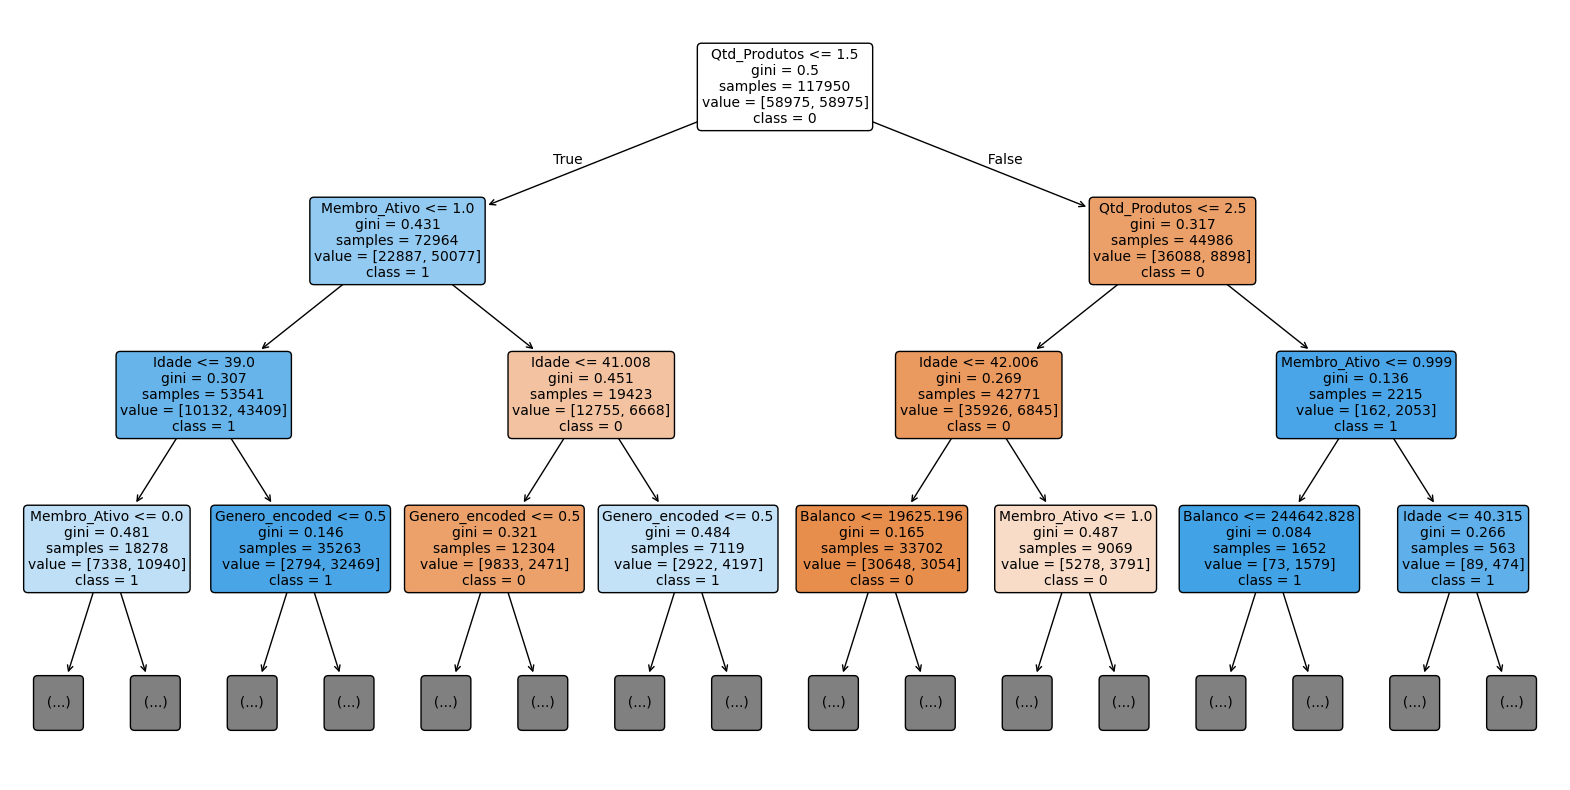

A profundidade real da sua árvore de decisão é: 39


In [36]:
plt.figure(figsize=(20,10))
plot_tree(modelo_arvore,
          max_depth=3, # Aqui eu limitei a profundidade dela pois estava demorando um pouco para gerar a árvore e como quis testar algumas coisas, precisei plotar árias vezes
          feature_names=X_treino.columns.tolist(),
          class_names=['0', '1'], 
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

profundidade_real_da_arvore = modelo_arvore.tree_.max_depth

print(f"A profundidade real da sua árvore de decisão é: {profundidade_real_da_arvore}")
# A rofundidade da árvore é 39. Isso indica que seriam 39 linhas de decisão.

# 6) Identifique as 2 principais features do modelo.


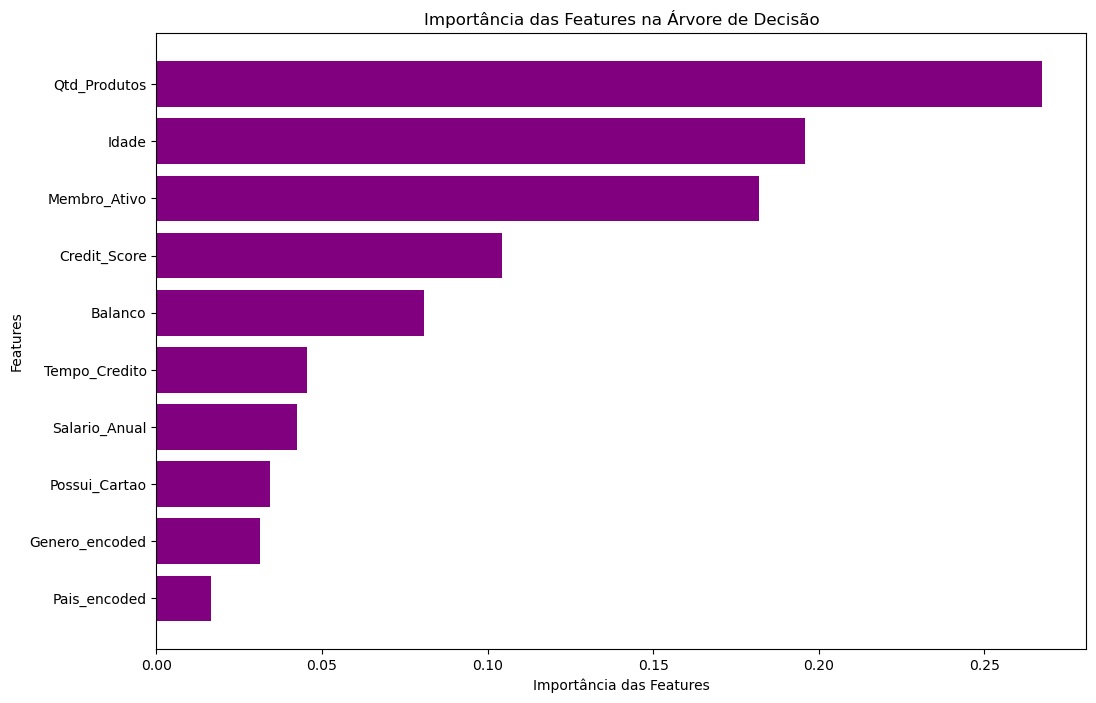

Pais_encoded      0.016374
Genero_encoded    0.031131
Possui_Cartao     0.034223
Salario_Anual     0.042444
Tempo_Credito     0.045473
Balanco           0.080774
Credit_Score      0.104225
Membro_Ativo      0.182026
Idade             0.195928
Qtd_Produtos      0.267402
dtype: float64


In [70]:
principais = modelo_arvore.feature_importances_
nomes_features = X_treino.columns.tolist()
df_importancias = pd.Series(principais, index=nomes_features)
df_ordenada = df_importancias.sort_values(ascending=True)

# Criando um gráfico de barras ordenado que mostre a importância das features
plt.figure(figsize=(12, 8))
plt.barh(df_ordenada.index, df_ordenada.values, color = 'purple')
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()
print(df_ordenada)
#Pelo gráfico podemos perceber que as principais features de impacto na predição são: 'Qtd_Produtos' (26%) e 'Idade' (19%)

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [78]:
X_treino_reduzido = X_treino[['Qtd_Produtos', 'Idade']]
X_teste_reduzido = X_teste[['Qtd_Produtos', 'Idade']]
modelo_arvore_reduzido = DecisionTreeClassifier(criterion='gini', random_state=0)
modelo_arvore_reduzido.fit(X_treino_reduzido, Y_treino)
previsoes_reduzido = modelo_arvore_reduzido.predict(X_teste_reduzido)
relatorio = classification_report(Y_teste, previsoes_reduzido)
print(relatorio)

# De maneira geral, o modelo teve uma melhora após a pode, a acurácia subiu de 79% para 85%. O Recall da classe 1.0, entretanto, continua MUITo baixo,
# Quase um chute aleatório.

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     19649
         1.0       0.67      0.52      0.59      5278

    accuracy                           0.85     24927
   macro avg       0.78      0.73      0.75     24927
weighted avg       0.84      0.85      0.84     24927



# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

In [ ]:
'''
Com certeza a árvore de decisão levou a melhor, principalmente após a escolha de poda dos features. O modelo previsto pelo método de Naives Bayes 
teve acurácia de 55%, enquanto a árvore de decisão apresentou 85%. 
Vale ressaltar, mais uma vez que, para a classe 1.0, os modelos tiveram assertividade semelhantes.
'''